# English Layouts Evaluation

I decided to test English layouts with the evaluation method used with Russian ones.

In [1]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

I took some New Yorker articles from archive.org. They're quite long. I replaced the pretty double/single quotes to standard, and long dash with standard hyphen, otherwise they're not counted at all.

## Position Penalties

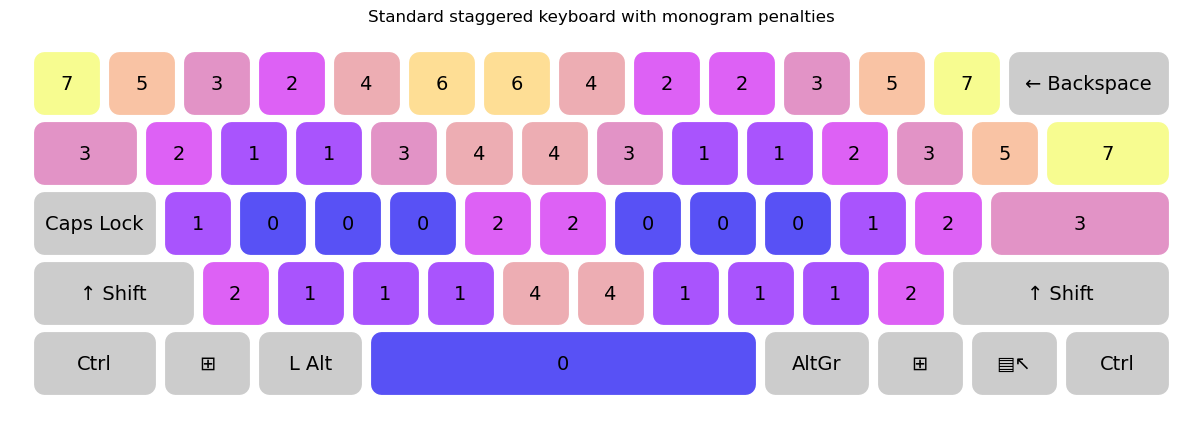

In [2]:
_ = STANDARD_KBD.display()

In [3]:
ENG = Corpus.from_path('english.txt', types={'v': 'aoeui', 'c': 'bcdfghjklmnpqrstvwxyz'})

In [4]:
# Analyzing Where Keys Gravitate to

## Inner (index finger) or outer (pinky)


In [5]:
ENG.bigrams

,bigram,num,l1,l2,t1,t2,freq
0,by,231,b,y,c,c,0.000939
1,y⌴,1817,y,⌴,c,-,0.007386
2,⌴p,1572,⌴,p,-,c,0.006390
3,pa,676,p,a,c,v,0.002748
4,au,212,a,u,v,v,0.000862
...,...,...,...,...,...,...,...
1129,9/,1,9,/,-,-,0.000004
1130,/1,1,/,1,-,-,0.000004
1131,h?,1,h,?,c,-,0.000004
1132,bd,1,b,d,c,c,0.000004


,freq_out,freq_in,outer,frequency,outerness
l1,,,,,
o,95.527290,60.202518,-35.324772,155.729808,-2268.337249
e,97.681736,63.129311,-34.552424,160.811047,-2148.634985
i,68.617049,44.877501,-23.739548,113.494551,-2091.690544
a,30.934582,69.714597,38.780015,100.649179,3852.988691
u,20.609505,75.446234,54.836730,96.055739,5708.844689


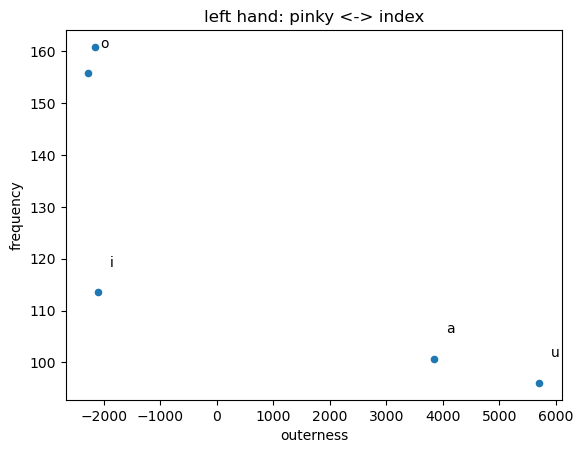

In [6]:
ENG.display_outerness("(t1 == 'v') & (t2 == 'v')", True)

,freq_out,freq_in,outer,frequency,outerness
q,0.000000,1.788596,-1.788596,1.788596,-10000.000000
v,0.365849,9.918578,-9.552729,10.284427,-9288.537549
h,22.804600,318.532701,-295.728101,341.337301,-8663.808503
j,0.121950,1.178847,-1.056898,1.300797,-8125.000000
y,10.487677,87.844457,-77.356780,98.332134,-7866.887143
d,31.991480,121.136734,-89.145254,153.128214,-5821.608707
k,19.471307,35.406072,-15.934765,54.877380,-2903.703704
g,43.251505,77.438080,-34.186575,120.689585,-2832.603570
m,29.308586,28.089088,1.219497,57.397674,212.464589
l,121.705833,114.144949,7.560883,235.850782,320.579111


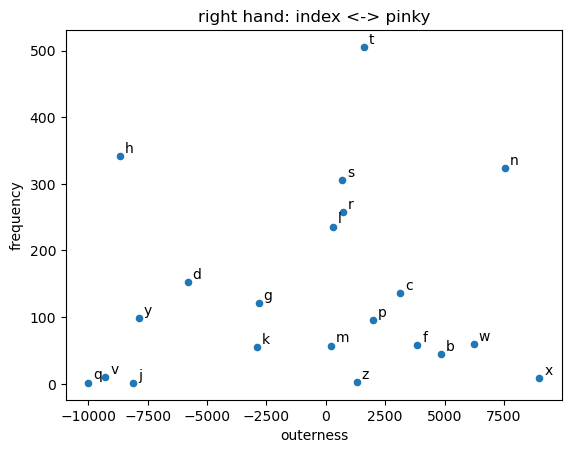

In [7]:
ENG.display_outerness("(t1 == 'c') & (t2 == 'c')")

In [8]:
eng_layouts = {
    'sholes1': r'''
    
`12345 67890-=
→qwert yuiop[]\
 asdfg hjkl;'¶
 zxcvb nm,./
⌴

~!"#$% ^&*()_+
 ∅∅∅∅∅ ∅∅∅∅∅{}|
 ∅∅∅∅∅ ∅∅∅∅:"∅
 ∅∅∅∅∅ ∅∅<>?
∅
''',

    'dvorak': r'''
`75319 02468[]
→:,.py fgcrl/=\
 aoeui dhtns-¶
 ;qjkx bmwvz
⌴

~#()"% -∅$@*{}
 ?'∅∅∅ ∅∅∅∅∅?+|
 ∅∅∅∅∅ ∅∅∅∅∅_
 !∅∅∅∅ ∅∅∅∅∅
∅
''',
    'colemak': r'''
`12345 67890-=
→qwfpg jluy;[]\
 arstd hneio'¶
 zxcvb km,./
⌴

~!"#$% ^&*()_+
 ∅∅∅∅∅ ∅∅∅∅:{}|
 ∅∅∅∅∅ ∅∅∅∅∅"∅
 ∅∅∅∅∅ ∅∅<>?
∅
''',
  
    # note: 0 & 1 weren't there in the real layout.
    'sholes2': r'''
012345 6789$&z
→xpmch rtnsdgk`
 jbwfl aeiouy¶
 qv:;. ,!?-"_
⌴

~@#∅% ^∅*()_+
 ∅∅∅∅∅ ∅∅∅∅:{}|
 ∅∅∅∅∅ ∅∅∅∅∅∅
 ∅∅[]< >∅∅∅∅∅
∅
''',

    'blick': r'''
∅∅∅∅∅∅ ∅∅∅∅∅∅∅
→∅zxkg bvqj∅∅∅∅
 .pwfu lcmy,¶
 dhiat ensor
⌴

∅∅∅∅∅∅ ∅∅∅∅∅∅
 &∅∅∅( )@#*∅∅∅∅
 -/'"! ;?%:`
 12345 67890
∅
''',
}


In [9]:
# these keys MUST be in any layout, otherwise the code throws an exception and halts
ENG_BASE = set('`-!?%*():;.,⌴¶abcdefghijklmnopqrstuvwxyz')

eng_res = {}
for k, l in eng_layouts.items():
    print(k, end=': ')
    eng_res[k] = r = Result(ENG, Layout(k, l, base_keys=ENG_BASE))
    print(r.score)

sholes1: key """ repeated: 2
2.6728822935988807
dvorak: key "?" repeated: 2
key "-" repeated: 2
1.352016076542567
colemak: key """ repeated: 2
1.4025838784210356
sholes2: key ":" repeated: 2
key "_" repeated: 2
2.7348288297108545
blick: 2.553202828154621


# Standings

In [10]:
comments = {'sholes1': 'QWERTY, 1879', 'sholes2': 'Sholes\' last layout, 1889', 'dvorak': '1936', 'colemak': '2006', 'blick': 'Blickensderfer №4, 1895'}
print(pd.DataFrame([(k, v.score.round(3), comments[k]) for k, v in eng_res.items()],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False))

| layout   |   score | comment                   |
|:---------|--------:|:--------------------------|
| dvorak   |   1.352 | 1936                      |
| colemak  |   1.403 | 2006                      |
| blick    |   2.553 | Blickensderfer №4, 1895   |
| sholes1  |   2.673 | QWERTY, 1879              |
| sholes2  |   2.735 | Sholes' last layout, 1889 |


Dvorak layout is still the best, if we weigh bigrams seriously. Colemak was a mix of both, and scores slightly worse, but not as badly as I expected.

## Arrow Maps

The less arrows, the better.

Look at the arrow maps: almost all arrows are thin, and there are few of them. QWERTY has lots of thick arrows. Colemak has noteably more than Dvorak, but the score is quite ok.

I expected Colemak to have a lot of costs on the left hand, but it has more on the right.

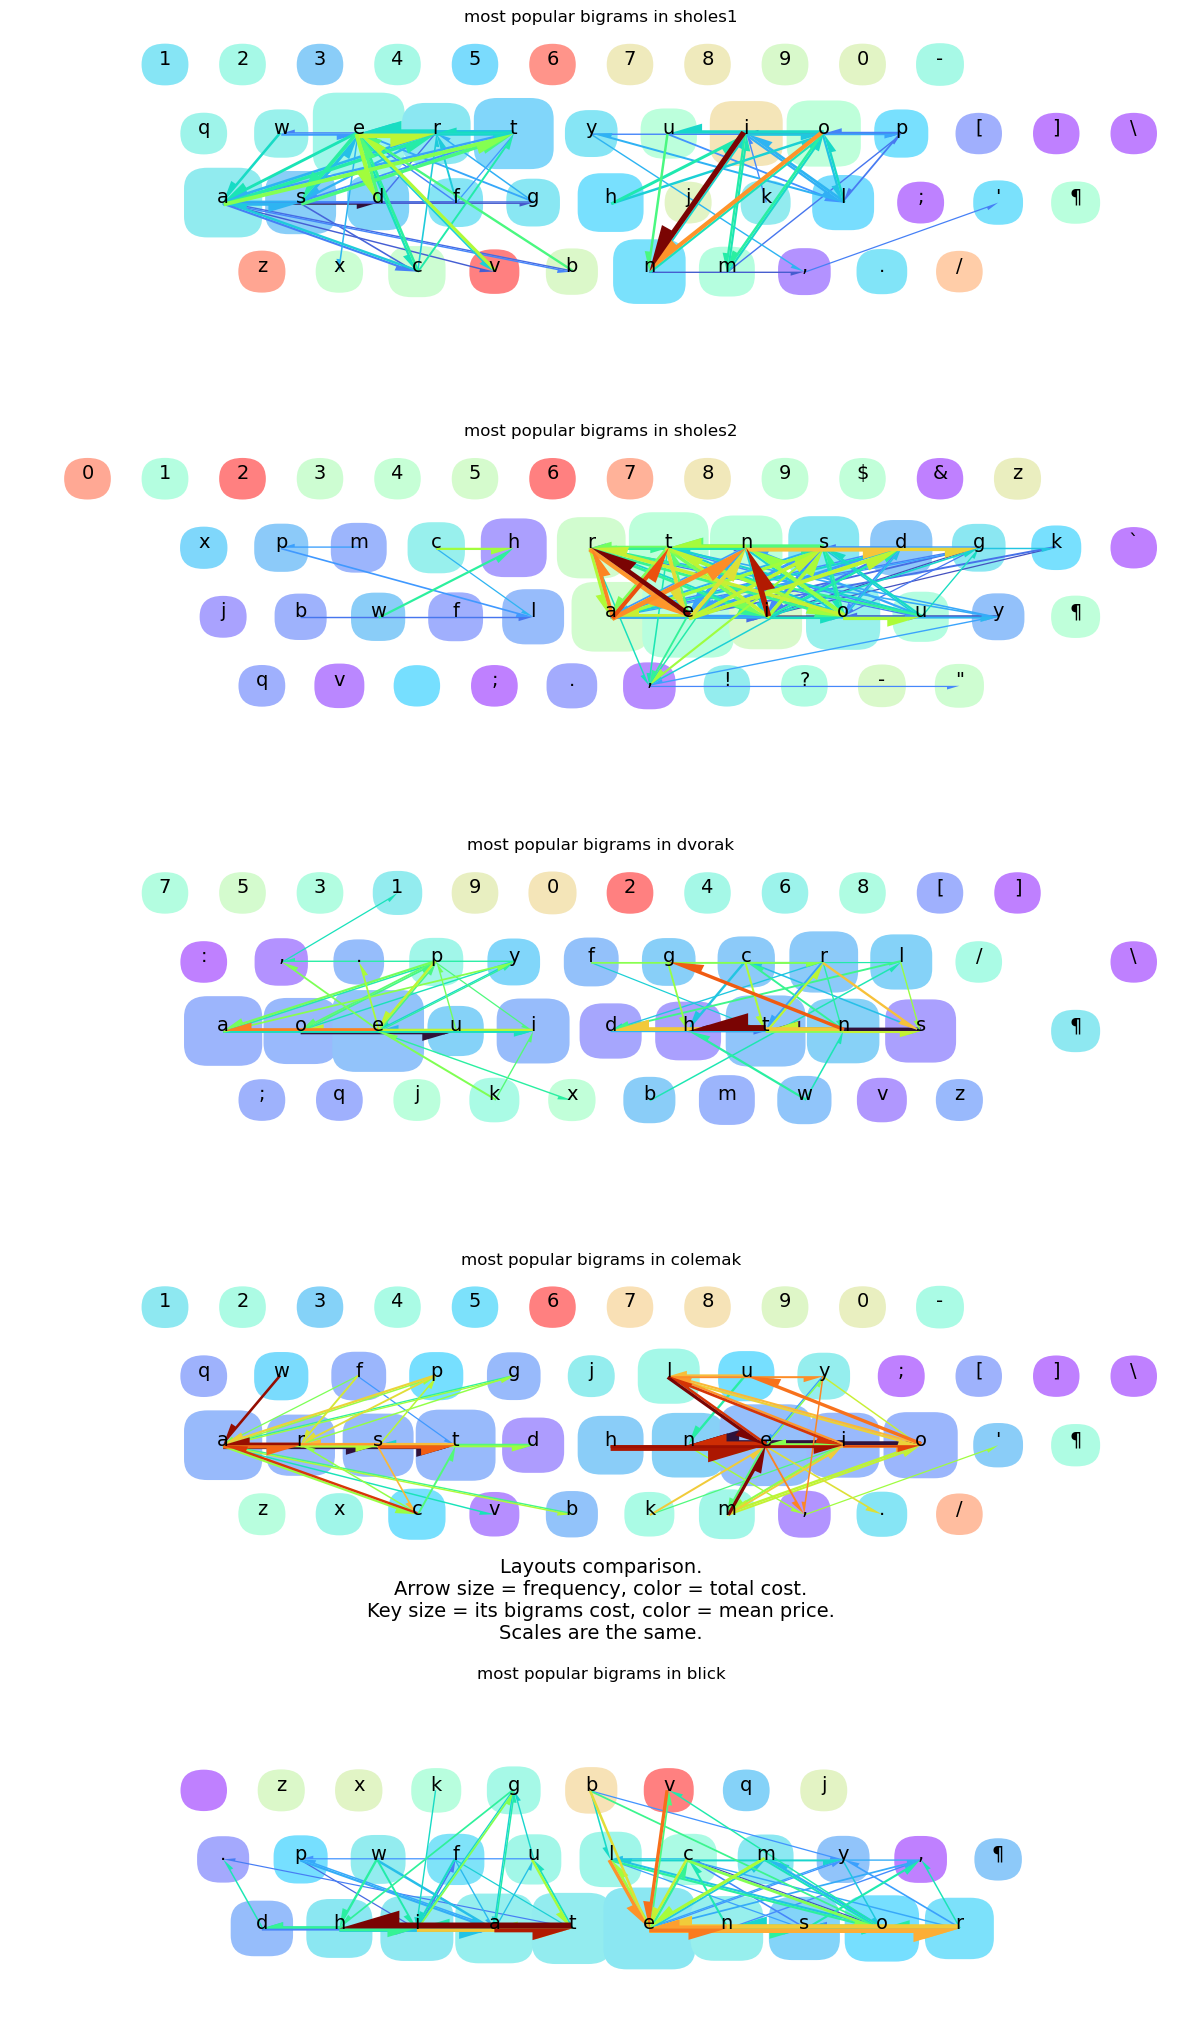

In [11]:
eng_res['sholes1'].combomap(eng_res['sholes2'], eng_res['dvorak'], eng_res['colemak'], eng_res['blick'])

<AxesSubplot: xlabel='finger'>

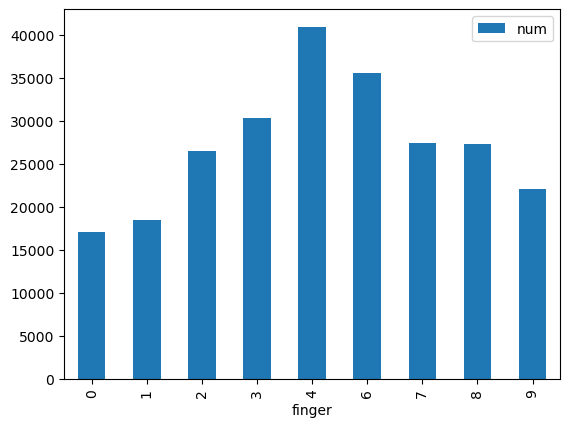

In [12]:
eng_res['dvorak'].bigrams.groupby('finger').agg({'num': 'sum'}).plot.bar()

# Gravitation to Rows

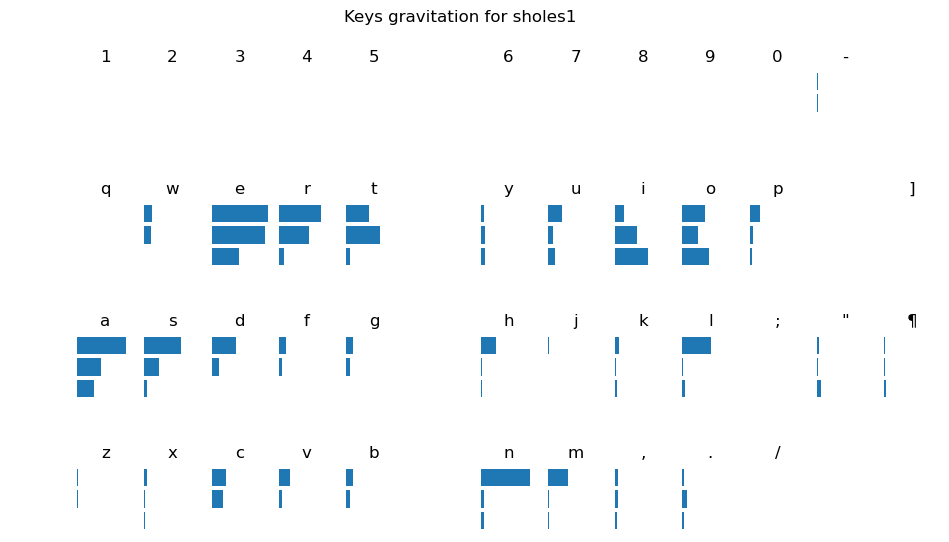

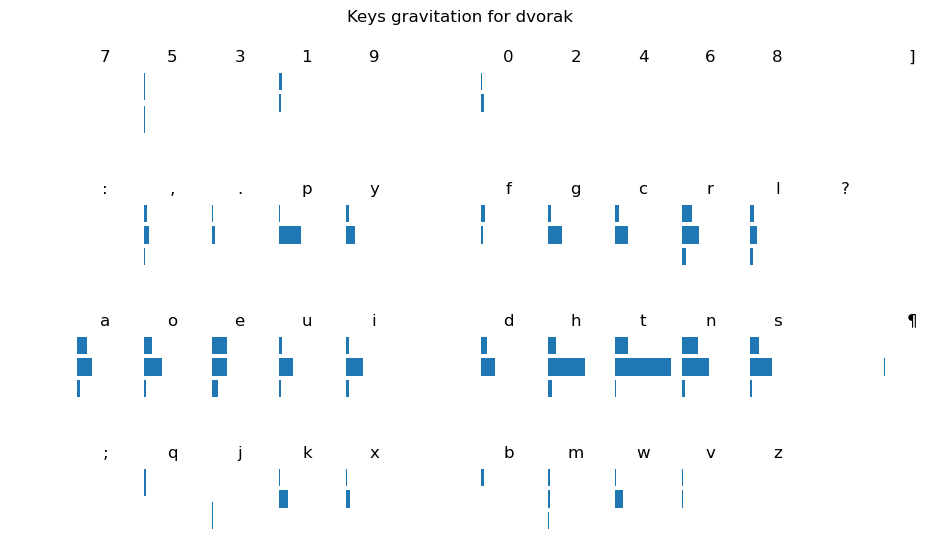

In [13]:
eng_res['sholes1'].display('rows')
eng_res['dvorak'].display('rows')